In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ParkScore 데이터 불러오기
parkscore = pd.read_csv("./data/parkscore.csv")

# 정신건강 데이터 불러오기 
mental = pd.read_csv("./data/시군구별_정신질환통계/시군구_성별_주요정신질환통계.csv")

In [31]:
parkscore

,도,도시명,접근 점수,면적 점수,투자 점수,공평 점수,시설 점수,총 점수,순위,도시 총 인구
0,광역특별시,대구광역시,67,56,94,43,100,72,12,"2,363,691"
1,광역특별시,광주광역시,71,61,100,71,100,81,4,"1,431,050"
2,광역특별시,대전광역시,76,69,58,66,54,65,20,"1,446,072"
3,광역특별시,부산광역시,52,75,54,49,80,62,28,"3,367,246"
4,광역특별시,서울특별시,77,70,100,36,100,77,9,"9,428,372"
...,...,...,...,...,...,...,...,...,...,...
80,충청남도,아산시,45,39,100,36,100,64,22,"334,539"
81,충청남도,천안시,66,52,100,90,7,63,23,"657,559"
82,충청북도,제천시,63,10,100,26,67,53,49,"132,637"
83,충청북도,청주시,72,73,50,90,25,62,26,"863,625"


In [10]:
mental.head()

,Unnamed: 0,진료년도,상병구분,시도,시군구,성별,환자수,입내원일수,요양급여비용
0,0,2018,ADHD,서울,강남구,남,2143,17537,1069125590
1,1,2018,ADHD,서울,강남구,여,807,5714,345628290
2,2,2018,ADHD,서울,강동구,남,652,8691,400428070
3,3,2018,ADHD,서울,강동구,여,209,2241,100177800
4,4,2018,ADHD,서울,강서구,남,499,4396,201007460


In [11]:
mental.drop('Unnamed: 0', axis=1)

,진료년도,상병구분,시도,시군구,성별,환자수,입내원일수,요양급여비용
0,2018,ADHD,서울,강남구,남,2143,17537,1069125590
1,2018,ADHD,서울,강남구,여,807,5714,345628290
2,2018,ADHD,서울,강동구,남,652,8691,400428070
3,2018,ADHD,서울,강동구,여,209,2241,100177800
4,2018,ADHD,서울,강서구,남,499,4396,201007460
...,...,...,...,...,...,...,...,...
14995,2022,조현병,제주,서귀포시,여,132,1556,90597950
14996,2022,조현병,제주,제주시,남,609,18083,1635080120
14997,2022,조현병,제주,제주시,여,625,17480,1622983120
14998,2022,조현병,세종,세종시,남,155,3482,245189040


In [18]:
# 환자수 남/여 합치기
mental = mental.groupby(['진료년도', '상병구분', '시도', '시군구'], as_index=False)['환자수'].sum()

In [25]:
# 2022년도만 추출
mental = mental[mental['진료년도'] == 2022]

mental

,진료년도,상병구분,시도,시군구,환자수
6000,2022,ADHD,강원,강릉시,369
6001,2022,ADHD,강원,고성군,0
6002,2022,ADHD,강원,동해시,10
6003,2022,ADHD,강원,삼척시,119
6004,2022,ADHD,강원,속초시,26
...,...,...,...,...,...
7495,2022,조현병,충북,청주상당구,582
7496,2022,조현병,충북,청주서원구,1014
7497,2022,조현병,충북,청주청원구,136
7498,2022,조현병,충북,청주흥덕구,349


In [27]:
# 6가지 질병으로 나누기
unique_mental = mental['상병구분'].unique()

# 질병에 따른 딕셔너리 생성
condition_data = {condition: mental[mental['상병구분'] == condition] for condition in unique_mental}

# 질병에 따른 데이터셋 저장
for condition, data in condition_data.items():
    filename = f"./data/질병데이터셋/{condition}.csv"
    data.to_csv(filename, index=False)

In [46]:
# 비만 데이터 불러오기
fat = pd.read_csv("./data/비만.csv", encoding='cp949')

In [48]:
# 환자수 남/여 합치기
fat = fat.groupby(['시도', '시군구'], as_index=False)['환자수'].sum()
fat

,시도,시군구,환자수
0,강원,강릉시,121
1,강원,고성군,0
2,강원,동해시,0
3,강원,삼척시,11
4,강원,속초시,13
...,...,...,...
249,충북,청주상당구,91
250,충북,청주서원구,124
251,충북,청주청원구,10
252,충북,청주흥덕구,95


In [49]:
# fat.to_csv('./fat.csv')

In [29]:
# 질병별 정신건강 환자수 데이터셋
mental_health = pd.read_csv("./data/mental_2022.csv")

mental_health

,시군구,불변증,불안장애,우울증,조울증,조현병,ADHD
0,강릉시,3353,5559,5636,539,789,369
1,동해시,904,1687,1379,274,315,10
2,삼척시,952,1196,1524,87,69,119
3,속초시,1168,1444,1665,62,75,26
4,원주시,4022,7599,8135,1271,1328,1217
...,...,...,...,...,...,...,...
80,아산시,3700,3961,4572,433,1021,1085
81,천안시,9178,12125,14043,2539,2150,1572
82,제천시,1805,1458,4122,169,289,30
83,청주시,13245,15233,20729,2074,2081,2177


In [32]:
# mental_heatlh 데이터셋 기존 parkscore 데이터셋 순서와 동일하게 맞추기
desired_order_list = [
    '대구광역시', '광주광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시',
    '강릉시', '동해시', '삼척시', '속초시', '원주시', '춘천시', '태백시', '고양시', '과천시', '광명시', '광주시', '구리시',
    '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
    '여주시', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시', '거제시',
    '김해시', '밀양시', '사천시', '양산시', '진주시', '창원시', '통영시', '경산시', '경주시', '구미시', '김천시', '문경시',
    '상주시', '안동시', '영주시', '영천시', '포항시', '광양시', '나주시', '목포시', '순천시', '여수시', '군산시', '김제시',
    '남원시', '익산시', '전주시', '정읍시', '서귀포시', '제주시', '계룡시', '공주시', '논산시', '당진시', '보령시', '서산시',
    '아산시', '천안시', '제천시', '청주시', '충주시'
]

# Reorder the dataframe according to the desired order
mental_health['시군구'] = pd.Categorical(mental_health['시군구'], categories=desired_order_list, ordered=True)
mental_health = mental_health.sort_values('시군구')

In [33]:
mental_health

,시군구,불변증,불안장애,우울증,조울증,조현병,ADHD
54,대구광역시,42355,56095,51037,5885,7937,7551
53,광주광역시,16856,22586,29742,3073,4062,3573
55,대전광역시,23444,36369,32075,4101,4520,4481
56,부산광역시,60747,70616,82660,8116,9862,13868
57,서울특별시,164808,195422,271500,43181,31761,52830
...,...,...,...,...,...,...,...
80,아산시,3700,3961,4572,433,1021,1085
81,천안시,9178,12125,14043,2539,2150,1572
82,제천시,1805,1458,4122,169,289,30
83,청주시,13245,15233,20729,2074,2081,2177


In [34]:
# mental_health.to_csv('./mental_health.csv')

In [37]:
# 데이터셋 합치기 : mental_health + parkscore 

# 속성명 변경
mental_health.rename(columns={'시군구': '도시명'}, inplace=True)

# '도시명' 으로 병합 진행
merged_data = pd.merge(mental_health, parkscore, on='도시명', how='inner')

In [38]:
parkscore_columns = ['도시명', '도', '접근 점수', '면적 점수', '투자 점수', '공평 점수', '시설 점수', '총 점수', '순위', '도시 총 인구']
mental_health_columns = ['불변증', '불안장애', '우울증', '조울증', '조현병', 'ADHD']

# Reorder the columns in the merged dataframe
reordered_columns = parkscore_columns + mental_health_columns
merge = merged_data[reordered_columns]

In [39]:
merge

,도시명,도,접근 점수,면적 점수,투자 점수,공평 점수,시설 점수,총 점수,순위,도시 총 인구,불변증,불안장애,우울증,조울증,조현병,ADHD
0,대구광역시,광역특별시,67,56,94,43,100,72,12,"2,363,691",42355,56095,51037,5885,7937,7551
1,광주광역시,광역특별시,71,61,100,71,100,81,4,"1,431,050",16856,22586,29742,3073,4062,3573
2,대전광역시,광역특별시,76,69,58,66,54,65,20,"1,446,072",23444,36369,32075,4101,4520,4481
3,부산광역시,광역특별시,52,75,54,49,80,62,28,"3,367,246",60747,70616,82660,8116,9862,13868
4,서울특별시,광역특별시,77,70,100,36,100,77,9,"9,428,372",164808,195422,271500,43181,31761,52830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,아산시,충청남도,45,39,100,36,100,64,22,"334,539",3700,3961,4572,433,1021,1085
81,천안시,충청남도,66,52,100,90,7,63,23,"657,559",9178,12125,14043,2539,2150,1572
82,제천시,충청북도,63,10,100,26,67,53,49,"132,637",1805,1458,4122,169,289,30
83,청주시,충청북도,72,73,50,90,25,62,26,"863,625",13245,15233,20729,2074,2081,2177


In [40]:
# '도시 총 인구' 맨 뒤로 보내기
merge = merge.reindex(columns=[col for col in merge.columns if col != '도시 총 인구'] + ['도시 총 인구'])
merge

,도시명,도,접근 점수,면적 점수,투자 점수,공평 점수,시설 점수,총 점수,순위,불변증,불안장애,우울증,조울증,조현병,ADHD,도시 총 인구
0,대구광역시,광역특별시,67,56,94,43,100,72,12,42355,56095,51037,5885,7937,7551,"2,363,691"
1,광주광역시,광역특별시,71,61,100,71,100,81,4,16856,22586,29742,3073,4062,3573,"1,431,050"
2,대전광역시,광역특별시,76,69,58,66,54,65,20,23444,36369,32075,4101,4520,4481,"1,446,072"
3,부산광역시,광역특별시,52,75,54,49,80,62,28,60747,70616,82660,8116,9862,13868,"3,367,246"
4,서울특별시,광역특별시,77,70,100,36,100,77,9,164808,195422,271500,43181,31761,52830,"9,428,372"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,아산시,충청남도,45,39,100,36,100,64,22,3700,3961,4572,433,1021,1085,"334,539"
81,천안시,충청남도,66,52,100,90,7,63,23,9178,12125,14043,2539,2150,1572,"657,559"
82,제천시,충청북도,63,10,100,26,67,53,49,1805,1458,4122,169,289,30,"132,637"
83,청주시,충청북도,72,73,50,90,25,62,26,13245,15233,20729,2074,2081,2177,"863,625"


In [42]:
merge = merge.drop('도', axis=1)

In [43]:
merge

,도시명,접근 점수,면적 점수,투자 점수,공평 점수,시설 점수,총 점수,순위,불변증,불안장애,우울증,조울증,조현병,ADHD,도시 총 인구
0,대구광역시,67,56,94,43,100,72,12,42355,56095,51037,5885,7937,7551,"2,363,691"
1,광주광역시,71,61,100,71,100,81,4,16856,22586,29742,3073,4062,3573,"1,431,050"
2,대전광역시,76,69,58,66,54,65,20,23444,36369,32075,4101,4520,4481,"1,446,072"
3,부산광역시,52,75,54,49,80,62,28,60747,70616,82660,8116,9862,13868,"3,367,246"
4,서울특별시,77,70,100,36,100,77,9,164808,195422,271500,43181,31761,52830,"9,428,372"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,아산시,45,39,100,36,100,64,22,3700,3961,4572,433,1021,1085,"334,539"
81,천안시,66,52,100,90,7,63,23,9178,12125,14043,2539,2150,1572,"657,559"
82,제천시,63,10,100,26,67,53,49,1805,1458,4122,169,289,30,"132,637"
83,청주시,72,73,50,90,25,62,26,13245,15233,20729,2074,2081,2177,"863,625"


## 상관관계 분석

In [97]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

In [98]:
# 상관관계 분석을 위한 데이터셋 업로드
analysis = pd.read_csv("./thesis.csv")

analysis

,도시명,접근 점수,면적 점수,투자 점수,공평 점수,시설 점수,총 점수,순위,불변증,불안장애,우울증,조울증,조현병,ADHD,비만,도시 총 인구
0,대구광역시,67,56,94,43,100,72,12,42355,56095,51037,5885,7937,7551,741,"2,363,691"
1,광주광역시,71,61,100,71,100,81,4,16856,22586,29742,3073,4062,3573,625,"1,431,050"
2,대전광역시,76,69,58,66,54,65,20,23444,36369,32075,4101,4520,4481,782,"1,446,072"
3,부산광역시,52,75,54,49,80,62,28,60747,70616,82660,8116,9862,13868,1169,"3,367,246"
4,서울특별시,77,70,100,36,100,77,9,164808,195422,271500,43181,31761,52830,8440,"9,428,372"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,아산시,45,39,100,36,100,64,22,3700,3961,4572,433,1021,1085,109,"334,539"
81,천안시,66,52,100,90,7,63,23,9178,12125,14043,2539,2150,1572,363,"657,559"
82,제천시,63,10,100,26,67,53,49,1805,1458,4122,169,289,30,25,"132,637"
83,청주시,72,73,50,90,25,62,26,13245,15233,20729,2074,2081,2177,320,"863,625"


### 상관관계 함수

In [99]:
# 상관계수 및 p-value 계산 함수
def calculate_correlations(df, rank_column, target_columns):
    results = {}
    for column in target_columns:
        pearson_corr, pearson_p = pearsonr(df[rank_column], df[column])
        spearman_corr, spearman_p = spearmanr(df[rank_column], df[column])
        results[column] = {
            'Pearson': pearson_corr, 'Pearson p-value': pearson_p,
            'Spearman': spearman_corr, 'Spearman p-value': spearman_p
        }
    return results

### 환자수 상관관계 분석 진행

In [100]:
# 절대 환자 수 기준 상관계수 및 p-value 계산
selected_columns = ['순위', '불변증', '불안장애', '우울증', '조울증', '조현병', 'ADHD', '비만']
analysis_abs = analysis[selected_columns]
target_columns = ['불변증', '불안장애', '우울증', '조울증', '조현병', 'ADHD', '비만']
correlations_abs = calculate_correlations(analysis_abs, '순위', target_columns)
print("절대 환자 수 기준 상관계수 및 p-value:")
print(correlations_abs)

절대 환자 수 기준 상관계수 및 p-value:
{'불변증': {'Pearson': -0.30838683396008076, 'Pearson p-value': 0.004086251766321171, 'Spearman': -0.521985538401407, 'Spearman p-value': 3.002932414522509e-07}, '불안장애': {'Pearson': -0.3248987355968758, 'Pearson p-value': 0.002414733441002259, 'Spearman': -0.5168653507914793, 'Spearman p-value': 4.1000819050078e-07}, '우울증': {'Pearson': -0.2924287479665534, 'Pearson p-value': 0.006612015505503697, 'Spearman': -0.48808133712394675, 'Spearman p-value': 2.1547181187734916e-06}, '조울증': {'Pearson': -0.2805163377938931, 'Pearson p-value': 0.00931221982362531, 'Spearman': -0.5333203048661325, 'Spearman p-value': 1.47950706055302e-07}, '조현병': {'Pearson': -0.31666209336308354, 'Pearson p-value': 0.003150715699228381, 'Spearman': -0.5345007011620819, 'Spearman p-value': 1.3723072162807023e-07}, 'ADHD': {'Pearson': -0.2837674389190225, 'Pearson p-value': 0.008493236478946072, 'Spearman': -0.559240048343262, 'Spearman p-value': 2.649575896581277e-08}, '비만': {'Pearson': -0.25

### 비율로 상관관계 분석 진행

In [101]:
# '도시 총 인구' 열을 문자열에서 정수형으로 변환
analysis['도시 총 인구'] = analysis['도시 총 인구'].str.replace(',', '').astype(int)

In [102]:
# 인구 대비 비율 계산
analysis['불변증_비율'] = analysis['불변증'] / analysis['도시 총 인구']
analysis['불안장애_비율'] = analysis['불안장애'] / analysis['도시 총 인구']
analysis['우울증_비율'] = analysis['우울증'] / analysis['도시 총 인구']
analysis['조울증_비율'] = analysis['조울증'] / analysis['도시 총 인구']
analysis['조현병_비율'] = analysis['조현병'] / analysis['도시 총 인구']
analysis['ADHD_비율'] = analysis['ADHD'] / analysis['도시 총 인구']
analysis['비만_비율'] = analysis['비만'] / analysis['도시 총 인구']

In [103]:
# 필요한 열 선택 (순위와 비율 열)
selected_columns = ['순위', '불변증_비율', '불안장애_비율', '우울증_비율', '조울증_비율', '조현병_비율', 'ADHD_비율', '비만_비율']
analysis_per = analysis[selected_columns]
target_columns = ['불변증_비율', '불안장애_비율', '우울증_비율', '조울증_비율', '조현병_비율', 'ADHD_비율', '비만_비율']
correlations_per = calculate_correlations(analysis_per, '순위', target_columns)
print("인구 대비 비율 기준 상관계수 및 p-value:")
print(correlations_per)

인구 대비 비율 기준 상관계수 및 p-value:
{'불변증_비율': {'Pearson': -0.15012948038140855, 'Pearson p-value': 0.17024466897825755, 'Spearman': -0.13593902677350012, 'Spearman p-value': 0.21478798584926498}, '불안장애_비율': {'Pearson': -0.1386245482011112, 'Pearson p-value': 0.20578149162295495, 'Spearman': -0.17899159663865546, 'Spearman p-value': 0.10120221732194973}, '우울증_비율': {'Pearson': -0.14206712111856165, 'Pearson p-value': 0.1946344698497163, 'Spearman': -0.17518076998241155, 'Spearman p-value': 0.10880216140379381}, '조울증_비율': {'Pearson': -0.3091741333359103, 'Pearson p-value': 0.003987652934253072, 'Spearman': -0.31041625952706664, 'Spearman p-value': 0.0038364010686419117}, '조현병_비율': {'Pearson': -0.1607533171081566, 'Pearson p-value': 0.1416416579839124, 'Spearman': -0.22682346503820175, 'Spearman p-value': 0.03683956547732594}, 'ADHD_비율': {'Pearson': -0.5033970517663374, 'Pearson p-value': 9.081813033735206e-07, 'Spearman': -0.5287204748831097, 'Spearman p-value': 1.9780166583560638e-07}, '비만_비율':

## 상관관계 데이터 시각화

### 환자수 기준 상관관계 분석 시각화

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # MacOS에서 AppleGothic 폰트를 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호가 깨지는 현상을 방지

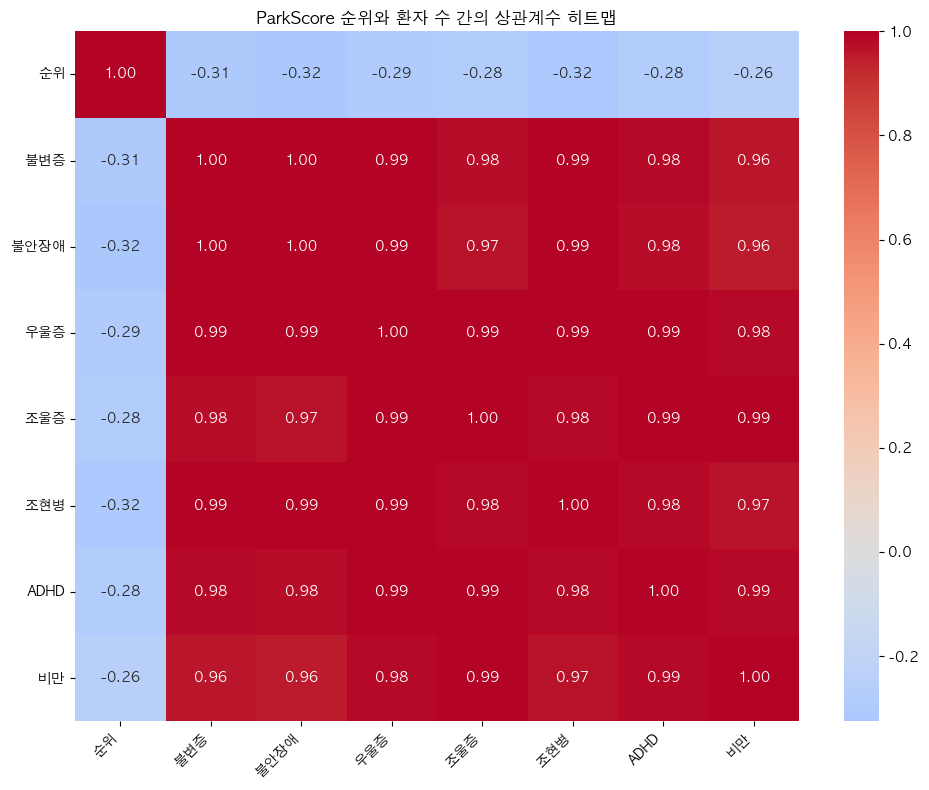

In [105]:
# 절대 환자 수로 상관계수 행렬 생성
correlation_matrix_abs = analysis[['순위', '불변증', '불안장애', '우울증', '조울증', '조현병', 'ADHD', '비만']].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_abs, annot=True, cmap='coolwarm', center=0, fmt=".2f", annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('ParkScore 순위와 환자 수 간의 상관계수 히트맵')
plt.tight_layout()
plt.show()

### 인구비율 기준 상관관계 분석 시각화

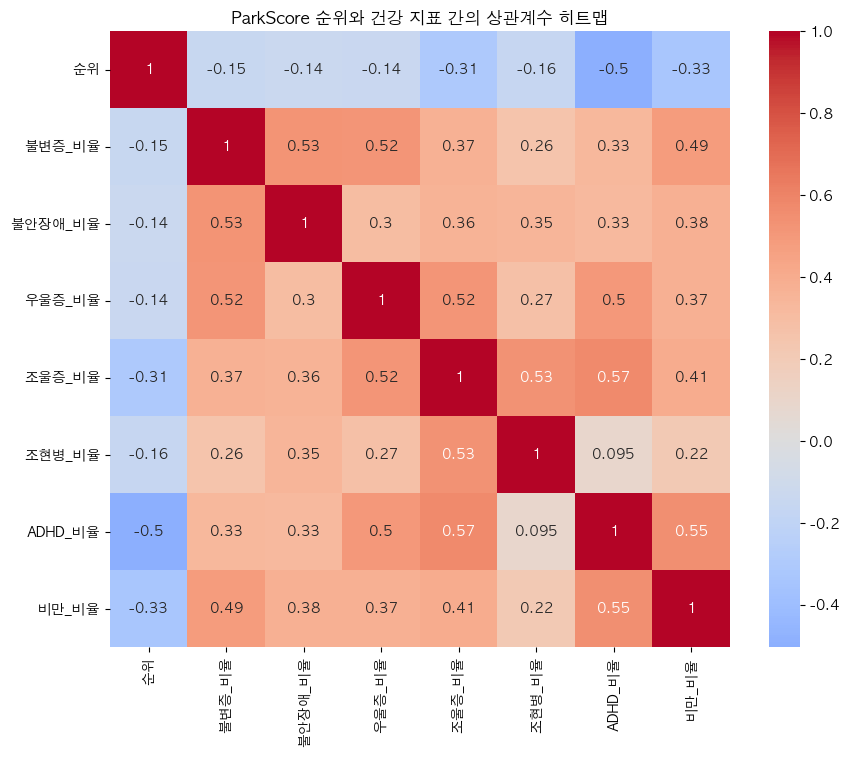

In [106]:
# 히트맵 (Heatmap)
correlation_matrix = analysis_per[['순위', '불변증_비율', '불안장애_비율', '우울증_비율', '조울증_비율', '조현병_비율', 'ADHD_비율', '비만_비율']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('ParkScore 순위와 건강 지표 간의 상관계수 히트맵')
plt.show()